In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file1 = "Resources/Revenue_Data.csv"
area_rev = pd.read_csv(file1, index_col=0).reset_index()
area_rev['Revenue'] = area_rev['Revenue'].div(1000000000).round(2)
area_rev.head()

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1.98
1,"Europe, Middle East and Africa",Q1 - 2018,0.89
2,Latin America,Q1 - 2018,0.54
3,Asia-Pacific,Q1 - 2018,0.20
4,United States and Canada,Q2 - 2018,2.05


In [62]:
file2 = "Resources/Subscriber_Data.csv"
area_sub = pd.read_csv(file2, index_col=0).reset_index()
area_sub['Subscribers'] = area_sub['Subscribers'].div(1000000).round(2)
area_sub.head()

,Area,Years,Subscribers
0,United States and Canada,Q1 - 2018,60.91
1,"Europe, Middle East and Africa",Q1 - 2018,29.34
2,Latin America,Q1 - 2018,21.26
3,Asia-Pacific,Q1 - 2018,7.39
4,United States and Canada,Q2 - 2018,61.87


In [63]:
group_years_rev = area_rev.groupby("Years")
group_rev_df = group_years_rev["Revenue"].sum().reindex(["Q1 - 2018", "Q2 - 2018", "Q3 - 2018","Q4 - 2018",
                                                      "Q1 - 2019", "Q2 - 2019", "Q3 - 2019","Q4 - 2019",
                                                      "Q1 - 2020", "Q2 - 2020"]).reset_index()
group_rev_df.style.format({"Revenue":"${:,.2f}"})

,Years,Revenue
0,Q1 - 2018,$3.61
1,Q2 - 2018,$3.82
2,Q3 - 2018,$3.90
3,Q4 - 2018,$4.11
4,Q1 - 2019,$4.44
5,Q2 - 2019,$4.85
6,Q3 - 2019,$5.17
7,Q4 - 2019,$5.40
8,Q1 - 2020,$5.69
9,Q2 - 2020,$6.09


In [73]:
group_years_sub = area_sub.groupby("Years")
group_sub_df = group_years_sub["Subscribers"].sum().reindex(["Q1 - 2018", "Q2 - 2018", "Q3 - 2018","Q4 - 2018",
                                                      "Q1 - 2019", "Q2 - 2019", "Q3 - 2019","Q4 - 2019",
                                                      "Q1 - 2020", "Q2 - 2020"]).reset_index()

group_sub_df

,Years,Subscribers
0,Q1 - 2018,118.90
1,Q2 - 2018,124.36
2,Q3 - 2018,130.43
3,Q4 - 2018,139.27
4,Q1 - 2019,148.86
5,Q2 - 2019,151.56
6,Q3 - 2019,158.33
7,Q4 - 2019,167.09
8,Q1 - 2020,182.86
9,Q2 - 2020,192.94


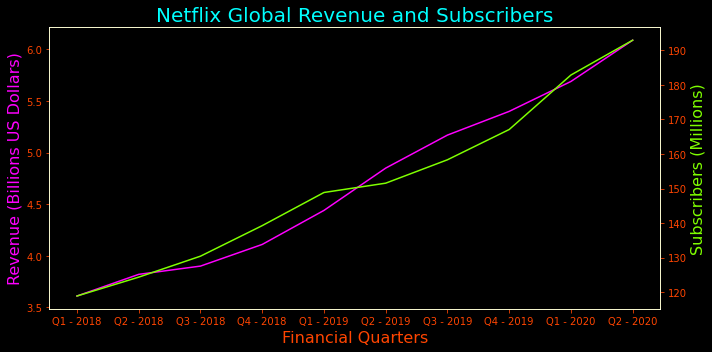

In [76]:
plt.style.use('dark_background')


x_axis = group_rev_df["Years"]
y_axis1 = group_rev_df["Revenue"]
y_axis2 = group_sub_df ["Subscribers"]


fig, ax = plt.subplots(figsize = (10, 5))

plt.title('Netflix Global Revenue and Subscribers', fontsize=20, color = 'aqua')

ax2 = ax.twinx()

ax.plot(x_axis, y_axis1, color = 'fuchsia')
ax2.plot(x_axis, y_axis2, color = 'chartreuse')

ax.set_xlabel('Financial Quarters', fontsize=16, color = 'orangered')
ax.set_ylabel('Revenue (Billions US Dollars)', fontsize=16, color = 'fuchsia')
  
ax2.set_ylabel('Subscribers (Millions)', fontsize=16, color = 'chartreuse')

ax.spines['top'].set_color('yellow')
ax.spines['bottom'].set_color('yellow')
ax.spines['right'].set_color('yellow')
ax.spines['left'].set_color('yellow')

ax.tick_params(axis='both', colors='orangered')
ax2.tick_params(axis='both', colors='orangered')

plt.tight_layout()

In [36]:
x_usc = area_sub["Years"][area_sub["Area"] == "United States and Canada"]
x_ema = area_sub["Years"][area_sub["Area"] == "Europe,  Middle East and Africa"]
x_la = area_sub["Years"][area_sub["Area"] == "Latin America"]
x_ap = area_sub["Years"][area_sub["Area"] == "Asia-Pacific"]

y_usc = area_rev["Revenue"][area_rev["Area"] == "United States and Canada"]
y_ema = area_rev["Revenue"][area_rev["Area"] == "Europe,  Middle East and Africa"]
y_la = area_rev["Revenue"][area_rev["Area"] == "Latin America"]
y_ap = area_rev["Revenue"][area_rev["Area"] == "Asia-Pacific"]

y2_usc = area_sub["Subscribers"][area_sub["Area"] == "United States and Canada"]
y2_ema = area_sub["Subscribers"][area_sub["Area"] == "Europe,  Middle East and Africa"]
y2_la = area_sub["Subscribers"][area_sub["Area"] == "Latin America"]
y2_ap = area_sub["Subscribers"][area_sub["Area"] == "Asia-Pacific"]

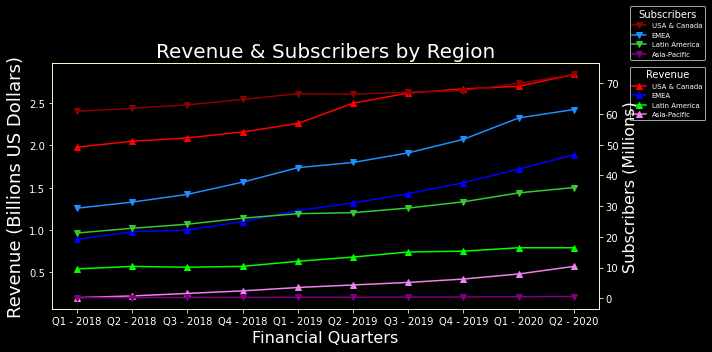

In [78]:
x_axis = group_rev_df["Years"]
y_axis1 = group_rev_df["Revenue"]
y_axis2 = group_sub_df ["Subscribers"]

fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Revenue & Subscribers by Region', fontsize=20, color = 'white')

ax2 = ax.twinx()

ax.plot(x_usc, y_usc, label = "USA & Canada", marker ="^", color = 'red')
ax2.plot(x_usc, y2_usc, label = "USA & Canada", marker ="v", color = 'darkred')
ax.plot(x_ema, y_ema, label = "EMEA", marker ="^", color = 'blue')
ax2.plot(x_ema, y2_ema, label = "EMEA", marker = "v", color = 'dodgerblue')
ax.plot(x_la, y_la, label = "Latin America", marker ="^", color = 'lime')
ax2.plot(x_la, y2_la, label = "Latin America", marker ="v", color = 'limegreen')
ax.plot(x_ap, y_ap, label = "Asia-Pacific", marker ="^", color = 'violet')
ax2.plot(x_ap, y_ap, label = "Asia-Pacific", marker ="v", color = 'purple')

plt.xticks(rotation=90)

ax.set_xlabel('Financial Quarters', fontsize=16, color = 'white')
ax.set_ylabel('Revenue (Billions US Dollars)', fontsize=18, color = 'white')

ax2.set_ylabel('Subscribers (Millions)', fontsize=16, color = 'white')

ax.spines['top'].set_color('yellow')
ax.spines['bottom'].set_color('yellow')
ax.spines['right'].set_color('yellow')
ax.spines['left'].set_color('yellow')

ax.legend(title='Revenue', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')
ax2.legend(title='Subscribers', bbox_to_anchor=(1.05, 1), loc='lower left', fontsize='x-small')

plt.tight_layout()